In [70]:
import pandas as pd

hourlySteps = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/hourlySteps_merged.csv')
dailySteps = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/dailySteps_merged.csv')
minuteSleep = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/minuteSleep_merged.csv')
sleepDay = pd.read_csv('C:/Users/rikmu/Documents/DataAnalysisCourse/Data/sleepDay_merged.csv')
dailySteps.groupby('Id').sum()
dailySteps.describe()
nsd = sleepDay[['Id','SleepDay','TotalMinutesAsleep']]
#nsd[nsd['TotalMinutesAsleep'] >= 1]
#df[df['age-years'] >= 10]
#sleepDay.head(2)
StepTotal = dailySteps[['Id','ActivityDay','StepTotal']]
StepTotal.columns = ['Id2','ActivityDay','StepTotal']
nsd
StepTotal

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [82]:
# Pair ID and Time to Minute asleep and Steps

def new_activity(row):
    row.SleepDay = row.SleepDay[:9]
    return row
sleep_day=sleepDay.apply(new_activity, axis="columns").rename(columns={"SleepDay":"ActivityDate"})
sleepcut = sleep_day[['Id','ActivityDate','TotalMinutesAsleep']]
sleepcut
#final = pd.merge(nsd, StepTotal, left_on=['Id','SleepDay','TotalMinutesAsleep'], right_on=['Id2','ActivityDay','StepTotal'])
#final = pd.merge(sleepDay, dailySteps, left_on=['Id','SleepDay','TotalMinutesAsleep'], right_on=['Id','ActivityDay','StepTotal'])
#final = pd.merge(nsd, StepTotal)


,Id,ActivityDate,TotalMinutesAsleep
0,1503960366,4/12/2016,327
1,1503960366,4/13/2016,384
2,1503960366,4/15/2016,412
3,1503960366,4/16/2016,340
4,1503960366,4/17/2016,700
...,...,...,...
408,8792009665,4/30/2016,343
409,8792009665,5/1/2016,503
410,8792009665,5/2/2016,415
411,8792009665,5/3/2016,516


Coefficients:  [[-0.00413946]]
Intercept:  [455.28734926]


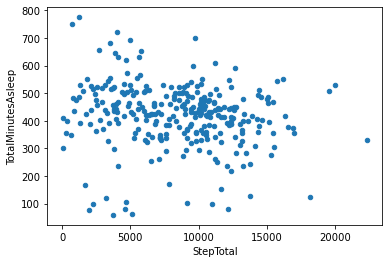

In [88]:
from sklearn import linear_model

sleepStep = sleepcut.merge(StepTotal, left_on=['Id','ActivityDate'], right_on=['Id2','ActivityDay'],copy=False)
sleepStepCut = sleepStep[['Id','TotalMinutesAsleep','StepTotal']]
sleepStepCut.plot.scatter(x='StepTotal',y='TotalMinutesAsleep')

regr = linear_model.LinearRegression()
regr.fit(sleepStep[['StepTotal']],sleepStep[['TotalMinutesAsleep']])
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)